In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

% matplotlib inline



In [2]:
import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
sns.set(rc={"figure.figsize": (18, 6), 'legend.fontsize': 18})

In [3]:
# load as Pandas dataframe
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


The logins are for the period starting January 1st 1970 through April 13 1970 covering a period of three months and two weeks approximately. There are a total of 877 ( 93142-92265) login times that coincide. What does that imply? This means more than one driver logged in simultanously in 877 of the available seconds out of the possible seconds to login in during this time period but the majority of the logins as expected (92265) are unique given that in this period of time from January 1 1970 20:12:16 to April 13 1970 18:57:38 there are 8808322 seconds. ( see calculation below ).

In [5]:
import datetime as dt

a = dt.datetime(1970, 1, 1,20,12,16)
b = dt.datetime(1970, 4, 13,18,57,38)

(b-a).total_seconds()

8808322.0

In [6]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


### Part One
Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [7]:
logins.set_index('login_time', inplace=True)
logins['login'] = 1

In [8]:
logins.loc[:,'weekday'] = logins.index.weekday    #The day of the week with Monday=0, Sunday=6
logins.loc[:, "date"] =logins.index.date
logins.head()

,login,weekday,date
login_time,,,
1970-01-01 20:13:18,1,3,1970-01-01
1970-01-01 20:16:10,1,3,1970-01-01
1970-01-01 20:16:37,1,3,1970-01-01
1970-01-01 20:16:36,1,3,1970-01-01
1970-01-01 20:26:21,1,3,1970-01-01


Visualize the data by means of a line plot with the time( 15 m intervals) on the x axis and the counts on the y axis. 

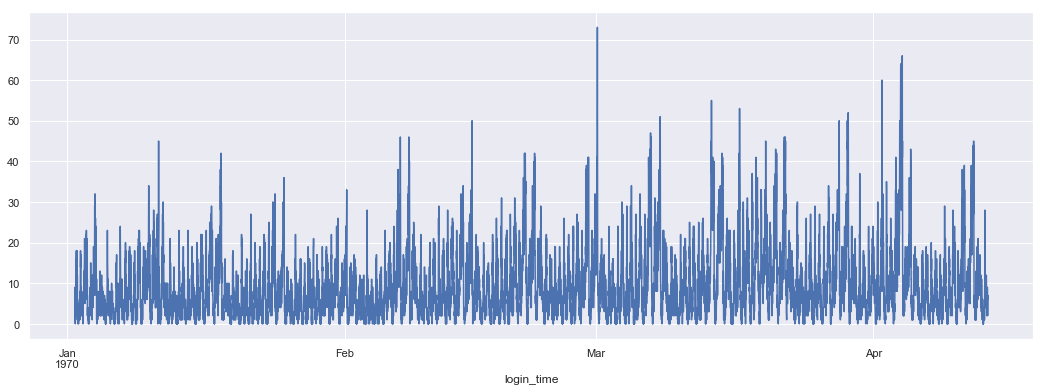

In [9]:
series=logins["login"].resample('15T').sum()
series.plot()
plt.show()

The above plot is dense. In March there appears a count that is way above the rest. This could potentially be a mistake that needs further investigation.  Replot the above using a point style instead of a connected line.( See plot below). Now we see that observation in March as being  relatively more than the other values. Also noteworthy is a line that we see in the counts between 0 and 10 counts indicating a gap in the counts around the range of 5 or 6. Also it appears that the frequency of logins per 15 minute interval have increased from January to April. 

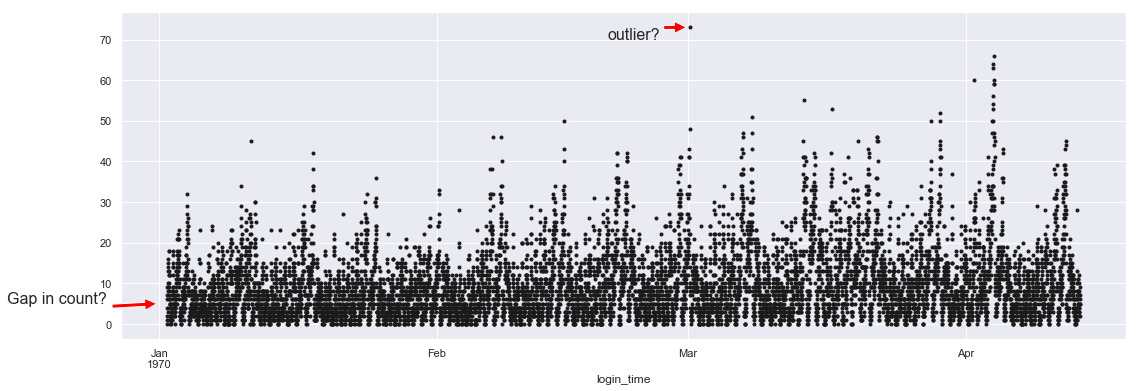

In [10]:
fig, ax = plt.subplots()
series.plot(style='k.')

ax.annotate('outlier?', xy=("1970-3-1", 73), xytext=("1970-2-20", 70), size=16, #add red arrow to show potential outlier point
            arrowprops=dict(facecolor='red', shrink=0.05))

ax.annotate('Gap in count?', xy=("1970-1-1", 5), xytext=("1969-12-15", 5), size=16,
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

Take a closer look at the point with the high value of logins in the 15 min interval. Which 15 min interval is this?

In [11]:

high_value= series[series>70]
high_value


login_time
1970-03-01 04:30:00    73
Freq: 15T, Name: login, dtype: int64

The login time interval was on March 1 at 4:30. ( 4:30-4:44 interval). Look at how many logins happened in the two adjascent intervals.

In [12]:
print(logins["login"]['1970-03-01 04:00':'1970-03-01 04:14'].count())
print(logins["login"]['1970-03-01 04:15':'1970-03-01 04:29'].count())
print(logins["login"]['1970-03-01 04:30':'1970-03-01 04:44'].count())
print(logins["login"]['1970-03-01 04:45':'1970-03-01 04:49'].count())

43
41
73
19


Look at plots by day of week and time of day to answer the following questions that come to mind.

1. Are there times of the day when there is more activity?
2. What changed are there considering day of week? Weekends? 

In [13]:
#make a dataframe with counts for each 15 min interval. Include a column with day of week
df = pd.DataFrame(logins["login"].resample('15T').count())
df['weekday'] = df.index.weekday  #The day of the week with Monday=0, Sunday=6
df['mth'] =df.index.month
df['day']=df['weekday']
df['hour']=df.index.hour
df['min']=df.index.minute
df.head()


,login,weekday,mth,day,hour,min
login_time,,,,,,
1970-01-01 20:00:00,2,3,1,3,20,0
1970-01-01 20:15:00,6,3,1,3,20,15
1970-01-01 20:30:00,9,3,1,3,20,30
1970-01-01 20:45:00,7,3,1,3,20,45
1970-01-01 21:00:00,1,3,1,3,21,0


In [14]:
#relabel weekdays and months

dayofweek ={ 0: 'Mon', 1:'Tue', 2: 'Wed' , 3: 'Thur', 4:'Fri' , 5: 'Sat', 6:'Sun'}

Monthname={1: 'January',  2: 'February', 3: 'March',  4: 'April'}


df['day'] = df.weekday.map(dayofweek)

df['month'] = df.mth.map(Monthname)

df.head(10)


,login,weekday,mth,day,hour,min,month
login_time,,,,,,,
1970-01-01 20:00:00,2,3,1,Thur,20,0,January
1970-01-01 20:15:00,6,3,1,Thur,20,15,January
1970-01-01 20:30:00,9,3,1,Thur,20,30,January
1970-01-01 20:45:00,7,3,1,Thur,20,45,January
1970-01-01 21:00:00,1,3,1,Thur,21,0,January
1970-01-01 21:15:00,4,3,1,Thur,21,15,January
1970-01-01 21:30:00,0,3,1,Thur,21,30,January
1970-01-01 21:45:00,4,3,1,Thur,21,45,January
1970-01-01 22:00:00,9,3,1,Thur,22,0,January


Take a look at total number of logins per day.

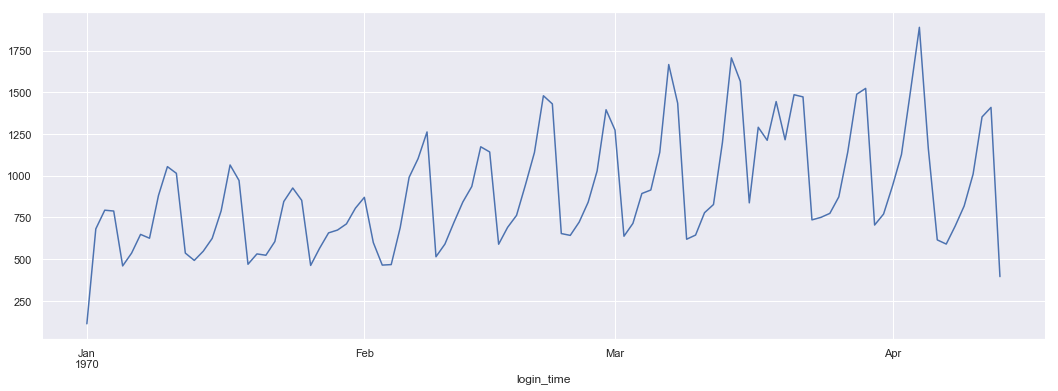

In [15]:
series_day_total=df["login"].resample('D').sum()
series_day_total.plot()

The plot above shows the peaks in the above plots happening more or less at comparable intervals. Indicating some periodic variation in the login counts by day of week. It appears that the login counts increase. peaks and drops regularly. One exception in the third peak in March when after the drop the rise in logins is rapid and indicates high counts for several days in that period. 

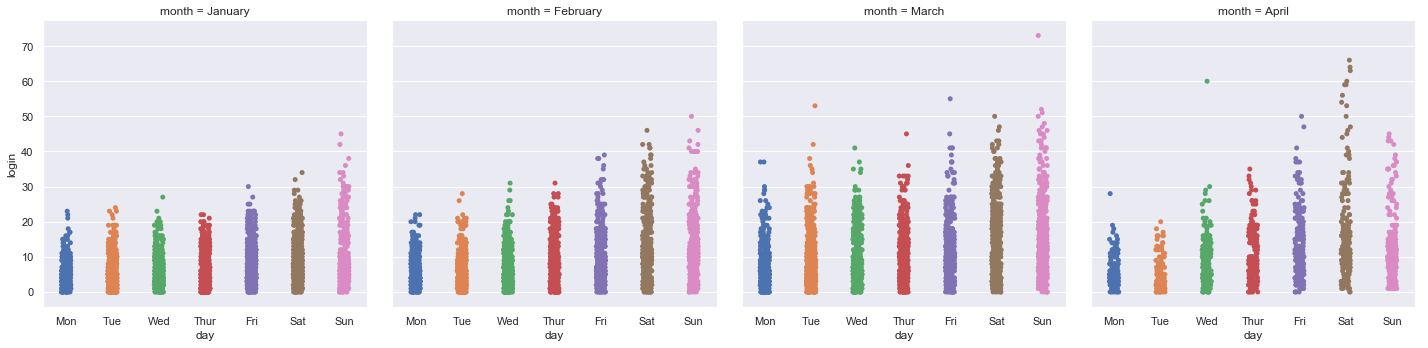

In [16]:
sum_month_weekday = sns.catplot(x='day', y='login', col ='month', data=df,
                                order=["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"])

Clearly from the above plots the count per 15 mins of logins increases from Monday to Sunday in January , February and March. The count is more on Saturdays than Sundays in April but we should also note that we have ony two weeks worth of data for April.
The increase in login counts per 15 mins intervals with day of week implies that on the weekends there are times that have a higher demand and low count intervals indicate lower demand. So we should look at the change in counts during the day.

In [17]:
import matplotlib.dates as mdates

Text(0.5,1,'Weekend')

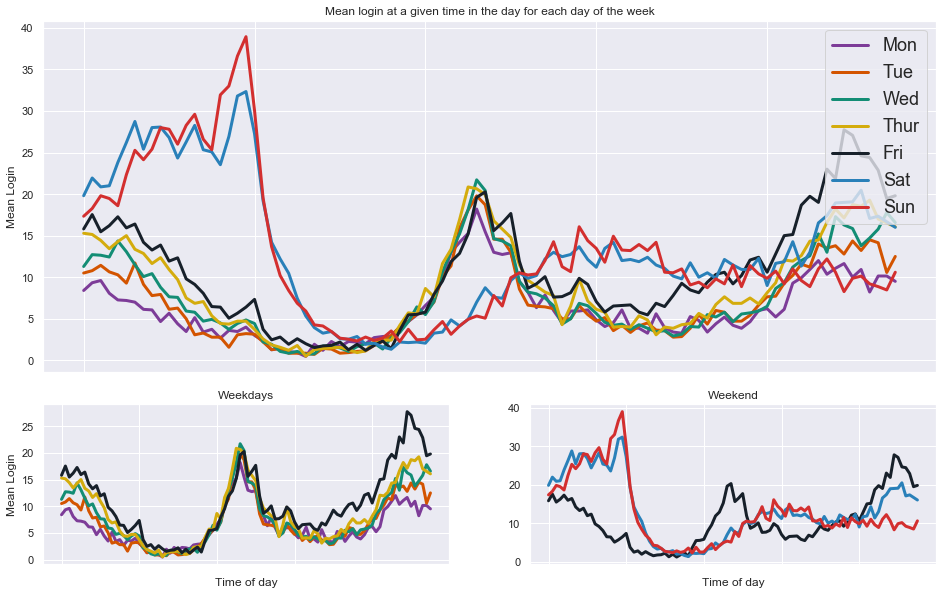

In [18]:
#arrange plotting grid. one plot with all days and two subplots : one for weekdays and one for weekends

gridsize = (3, 2)

fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# plot all days

#ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)

alldays =[ 'Mon', 'Tue',  'Wed' , 'Thur', 'Fri' , 'Sat', 'Sun']
colors = ['#7D3C98', "#D35400", "#138D75", '#D4AC0D',"#17202A", "#2980B9",'#D32F2F']
dct= {}

for i in alldays:
      mask = (df['day'] == i)
      dct['day_%s' %i] = df.loc[mask]   

for i, ((key, value) , j ) in enumerate(zip(dct.items(), colors)):
    
        dct[key].groupby(['hour', 'min'])['login'].mean().plot(linewidth=3, ax=ax1, color=j)
    

ax1.set_xlabel('')
ax1.set_ylabel('Mean Login')
ax1.set_title('Mean login at a given time in the day for each day of the week')
ax1.legend(alldays, loc='upper right')

   # need to add Xaxis ticks.


#plot weekdays only
#ax2 = plt.subplot2grid(gridsize, (2, 0))

weekday=['Mon', 'Tue',  'Wed' , 'Thur', 'Fri']

dct= {}

for i in weekday:
      mask = (df['day'] == i)
      dct['day_%s' %i] = df.loc[mask]   

for i, ((key, value),j) in enumerate(zip(dct.items(), colors)):   #designate specific color to each day.

    dct[key].groupby(['hour', 'min'])['login'].mean().plot(linewidth=3, ax=ax2, color=j)
    
ax2.set_xlabel('Time of day') 
ax2.set_ylabel('Mean Login')
ax2.set_title('Weekdays')


#plot weekends include Friday

colors = ['#17202A', "#2980B9", '#D32F2F']   #keep only colors for friday, Sat and Sunday
weekend=['Fri' , 'Sat', 'Sun']
dct= {}

for i in weekend:
      mask = (df['day'] == i)
      dct['day_%s' %i] = df.loc[mask]   

for i, ((key, value),j) in enumerate(zip(dct.items(), colors)):

    dct[key].groupby(['hour', 'min'])['login'].mean().plot(linewidth=3, ax=ax3, color=j)

    
ax3.set_xlabel('Time of day') 

ax3.set_title('Weekend')

#### Patterns Observed in the logins:

The change in Logins by hour shows:

    1.The logins for Monday through Thursday follow a similar pattern declining gradually from midnight to morning and steadily increasing with a peak at mid day to decline again and rise later in the day. 

    2.Saturday(Blue) and Sunday (Red) are different in that the logins increase from midnight peaking in the early morning hours and declining sharply to increase again around evening and with SAT increasing later whilst Sunday does not.
    
    3.Friday (Black) follows the weekday trend from midnight to midday but picks up and has the highest peak as night falls. 
    
These patterns agree well with what would be expected of human behaviour. During the weekday there is not much demand during the working hours, increasing at lunch time and declining again until after work. In the Weekends the demand is high at night time and picks up again later in the day. Friday early hours follows the weekday trend but the later hours follows the weekend trend



### Part 2 ‐ Experiment and metrics design
**qst:
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

**Answer:**
A key measure of success of this experiment would be if the number of trips that a driver from one side of the bridge
makes across to the other side is significantly more when the tolls are reimbursed versus when tolls are not reimbursed. 
The total number of trips per day the driver partners make across the toll bridge to the opposite area of operation could be obtained by keeping track of the tolls incurred by the driver when reimbursed as well as not reimbursed
       
      Total number of trips to the opposite side per day = Total amount paid in tolls per day/ two-way toll per crossing.
       
 The reason for choosing this metric is that it is:
 1. Measurable and Objective
 2. Easily reported
 3. Directly connected to what is hypothesised as the reason for the drivers to limit themselves to operate in one area only.  
       
**qst:
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on how you will implement the experiment what statistical test(s) you will conduct to verify the significance of the observation, how you would interpret the results and provide recommendations to the city operations team along with any caveats.**
       
**Answer:**

  1. Choose a minimum of two periods of time. eg. Two months or Two Bi-Weekly periods. In choosing this time period it would be necessary that it would be representative of the normal conditions one would encounter ( avoiding holiday periods etc) and covers the full cycle of variation present. ( Not have the first period be the weekend and the second period be the weekday)
  
  2. Use Stratified random allocation of drivers to either Group A or Group B. The stratification would be by the area they
     usually operate on. 
      
  3. The treatments would be Reimbursed/ Not reimbursed
     Drivers in Group A would be reimbursed in the first period and not reimbursed in the second period. 
     Drivers in Group B would not be reimbursed in the first period but reimbursed in the second period.
     ( This switch is to reduce the effect of carryover effect of period 1 activit to period 2  which would be balanced out by         doing this)
      
      
     | Group |  Period 1      |  Period 2      | 
     |-----------------------------------------|
     |  A    | Reimbursed     | Not Reimbursed |
     |  B    | Not Reimbursed | Reimbursed     |
  
  4. The Response Variable would be the count of two way tolls incurred by each driver per day.
  
  5. Hypothesis : 
  
     Null       : There is no change in the amount of tolls when Reimbursed vs Not Reimbursed.
     
     Alternative: There is an increase in the amount of tolls for the reimbursed Period vs the Not reimbursed  Period.
                  
                  
  6. Statistical Analysis: 
     The difference in the toll counts between (Reimbursed - not Reimbursed) would be obtained for each 
     driver. If the number of drivers participating less than 30 a permutaition test or if the numbers are larger 
     a one sided paired T test could be carried out to test for evidence for rejecting the null hypothesis. 
   
  7. If there is a statistical significance we should also consider if the difference is practically significant. 
   
  8. Basically this experiment would tell us if the toll is a deterrent to the drivers going across to the other side.
     There could be other reasons a driver partner may limit themselves to one region. eg Familiarity of the region.
     The time period chosen may impact the results. Several repetitions over the year would remove any biases.
     
   
   
                  
      


### Part 3:

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice).
What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [33]:
#Load json info
with open('ultimate_data_challenge.json') as f:
    ultimate = json.load(f)

#Convert to dataframe
ultimate = pd.DataFrame(ultimate)

#Convert the time series to datetimes appropriately
ultimate["signup_date_1"]= pd.to_datetime(ultimate.signup_date)
ultimate["last_trip_date_1"] = pd.to_datetime(ultimate.last_trip_date)

ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_date_1,last_trip_date_1
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-01-25,2014-06-17
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-01-29,2014-05-05
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-06,2014-01-07
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-01-10,2014-06-29
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-01-27,2014-03-15


In [34]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
signup_date_1             50000 non-null datetime64[ns]
last_trip_date_1          50000 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(4)
memory usage: 5.0+ MB


From above we can see that we have
1.  6 numeric( floating point) variables ( avg_dist, avg_rating_by_driver, avg_rating_of_driver, avg_surge, surge_pct,trips_in_first_30_Days and weekday_pct).
2.  3 categorical features: city , phone, ultimate_black_user.
3.  2 datetime features last_trip_date and trips_in_first_30_days. These two can be used to figure out the response if the rider was active in the last month before the 6th month after signup.
                            

In [35]:
ultimate.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [36]:
ultimate[['signup_date', 'last_trip_date']].describe()

,signup_date,last_trip_date
count,50000,50000
unique,31,182
top,2014-01-18,2014-06-29
freq,2948,2036


### Create Response Variable Active_Status:
The data are from a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; a user  is considered to be retained if they were “active” (i.e. took a trip) in the preceding 30 days.

All users who were active within 30 days prior to the date the data was pulled would be considered active and those who were not 
would be considered non active. The variable last_trip_date could be used to determine this. 
We first need to get the latest date for this variable. We would consider this data to be the date when the data was pulled. 
All users whose last_trip_date falls within 30 days of this date would be considered active indicated by a 1 and 0 otherwise.

In [37]:
ultimate['last_trip_date_1'].max()


Timestamp('2014-07-01 00:00:00')

In [38]:

active_status = []
for i in range(len(ultimate)):
   
    end_date = pd.Timestamp(ultimate['last_trip_date_1'].max())
    
    prior_30 = end_date - pd.Timedelta('30D') #set point 30 days prior
    
    if prior_30 <= pd.Timestamp(ultimate['last_trip_date_1'][i]) <= end_date:
        active_status.append(1) # If active, set active_status to 1
    else:
        active_status.append(0)
ultimate["active_status"] =active_status

In [40]:
ultimate[['signup_date', 'last_trip_date_1', "active_status"]].head(20)

,signup_date,last_trip_date_1,active_status
0,2014-01-25,2014-06-17,1
1,2014-01-29,2014-05-05,0
2,2014-01-06,2014-01-07,0
3,2014-01-10,2014-06-29,1
4,2014-01-27,2014-03-15,0
5,2014-01-09,2014-06-06,1
6,2014-01-24,2014-01-25,0
7,2014-01-28,2014-01-29,0
8,2014-01-21,2014-02-01,0
9,2014-01-03,2014-01-05,0


In [41]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
signup_date_1             50000 non-null datetime64[ns]
last_trip_date_1          50000 non-null datetime64[ns]
active_status             50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 5.4+ MB


In [42]:
ultimate.drop(["signup_date_1", "last_trip_date_1"], axis=1, inplace=True)

In [43]:
# number of missing values
print('numberof missing values for avg_rating_by_driver: {}'.format(50000-49799))
print('numberof missing values for avg_rating__of_driver: {}'.format(50000-41878))
print('numberof missing values for phone: {}'.format(50000-49604))

numberof missing values for avg_rating_by_driver: 201
numberof missing values for avg_rating__of_driver: 8122
numberof missing values for phone: 396


### Missing Values: 
There are missing values for avg_rating_by driver, avg_rating_of_driver and phone as the number of entries is 
less than 50000.
The number of missing values for phones is very small and those rows with missing phone could be dropped. The average ratings though may be important and some thought should be put into handling these values. 



In [44]:
ultimate["avg_rating_by_driver"].unique()

array([5. , 4.9, 4. , 3. , 4.8, 4.7, 4.5, 4.2, nan, 4.4, 4.6, 3.7, 4.3,
       3.5, 2. , 3.8, 2.5, 4.1, 3.9, 1. , 3.3, 3.4, 3.6, 3.2, 2.3, 2.8,
       1.5, 2.7])

In [45]:
ultimate["avg_rating_of_driver"].unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, nan, 4.5, 4. , 3.9, 4.9, 4.8, 2.5,
       3.7, 1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2,
       2.6, 3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

For both the ratings we will bin them into categories None ,0-1, 1-2, 2-3, 3-4, 4-5, where 0 would be the category with missing ratings.

In [46]:
ultimate["avg_rating_by_driver"]=ultimate["avg_rating_by_driver"].fillna(-1) #replace NAN as -1
ultimate["avg_rating_of_driver"]=ultimate["avg_rating_of_driver"].fillna(-1) #replace NAN as -1


bins = [-2, 0, 1.1, 2.1,  3.1, 4.1 ,5.1]

group_names = ['None', '0-1', '1-2', '2-3', '3-4', '4-5']

ultimate['avg_rating_by_driver_grouped'] = pd.cut(ultimate["avg_rating_by_driver"], bins, labels=group_names)
ultimate['avg_rating_of_driver_grouped'] = pd.cut(ultimate["avg_rating_of_driver"], bins, labels=group_names)

In [47]:
ultimate[['avg_rating_by_driver_grouped']].head()

,avg_rating_by_driver_grouped
0,4-5
1,4-5
2,4-5
3,4-5
4,4-5


In [48]:
ultimate[['avg_rating_of_driver_grouped']].tail()

,avg_rating_of_driver_grouped
49995,4-5
49996,None
49997,4-5
49998,2-3
49999,None


In [49]:
#drop the original columns
ultimate.drop(["avg_rating_by_driver", "avg_rating_of_driver" ], axis=1, inplace=True)

Next we will consider how to deal with the missing phone information.

In [50]:
ultimate["phone"].unique()

array(['iPhone', 'Android', None], dtype=object)

In [51]:
#how many have missing values.
ultimate['phone'].isnull().sum()

396

In [52]:
data_phone=ultimate[ultimate['phone'].isnull()].copy()  # makes a copy as opposed to a window into the original data.
data_phone.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 134 to 49868
Data columns (total 13 columns):
avg_dist                        396 non-null float64
avg_surge                       396 non-null float64
city                            396 non-null object
last_trip_date                  396 non-null object
phone                           0 non-null object
signup_date                     396 non-null object
surge_pct                       396 non-null float64
trips_in_first_30_days          396 non-null int64
ultimate_black_user             396 non-null bool
weekday_pct                     396 non-null float64
active_status                   396 non-null int64
avg_rating_by_driver_grouped    396 non-null category
avg_rating_of_driver_grouped    396 non-null category
dtypes: bool(1), category(2), float64(4), int64(2), object(4)
memory usage: 35.6+ KB


Before deleting those rows that have a missing entry for phone, take a look at the distribution of the missing entries? Are they proportionately missing from active_status=1 and active_status=0 .If we find that the missing phones are only restricted to one group or is dispropotionate then we may loose information if we delete these row.

In [53]:
#using the data with phone missing look at the proportions for each group: active and not active status.

data_phone.loc[:, 'phone']=1

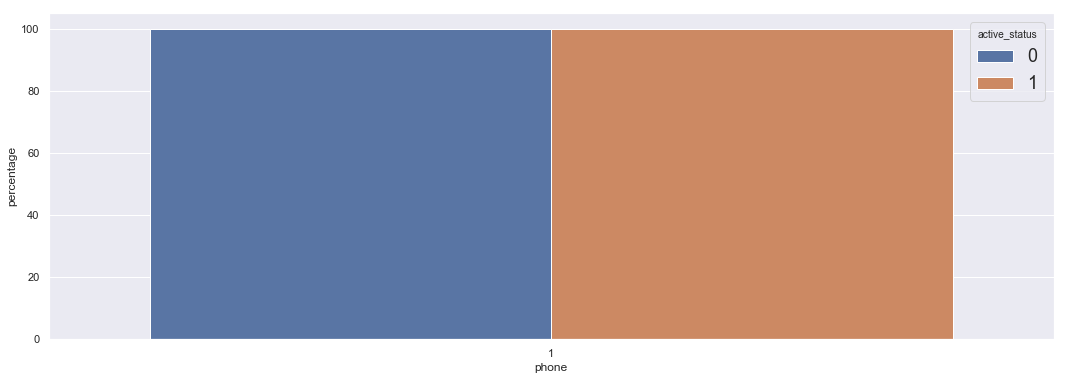

In [54]:
no_phones=(data_phone.groupby(['active_status'])['phone']
                            .value_counts(normalize=True)
                            .rename('percentage')
                            .mul(100)
                            .reset_index()
                            .sort_values('phone'))
p = sns.barplot(x='phone', y="percentage", hue="active_status", data=no_phones)

As the missing phone information is proportionately missing in both groups and it is only a small number we will drop those observations.


In [92]:
df= ultimate.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                        49604 non-null float64
avg_surge                       49604 non-null float64
city                            49604 non-null object
last_trip_date                  49604 non-null object
phone                           49604 non-null object
signup_date                     49604 non-null object
surge_pct                       49604 non-null float64
trips_in_first_30_days          49604 non-null int64
ultimate_black_user             49604 non-null bool
weekday_pct                     49604 non-null float64
active_status                   49604 non-null int64
avg_rating_by_driver_grouped    49604 non-null category
avg_rating_of_driver_grouped    49604 non-null category
dtypes: bool(1), category(2), float64(4), int64(2), object(4)
memory usage: 4.3+ MB



Take a look at the other features. What is their range of distribution? 

In [93]:
import datetime as dt
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
sns.set(color_codes=True)
%matplotlib inline

#### Continous Features:

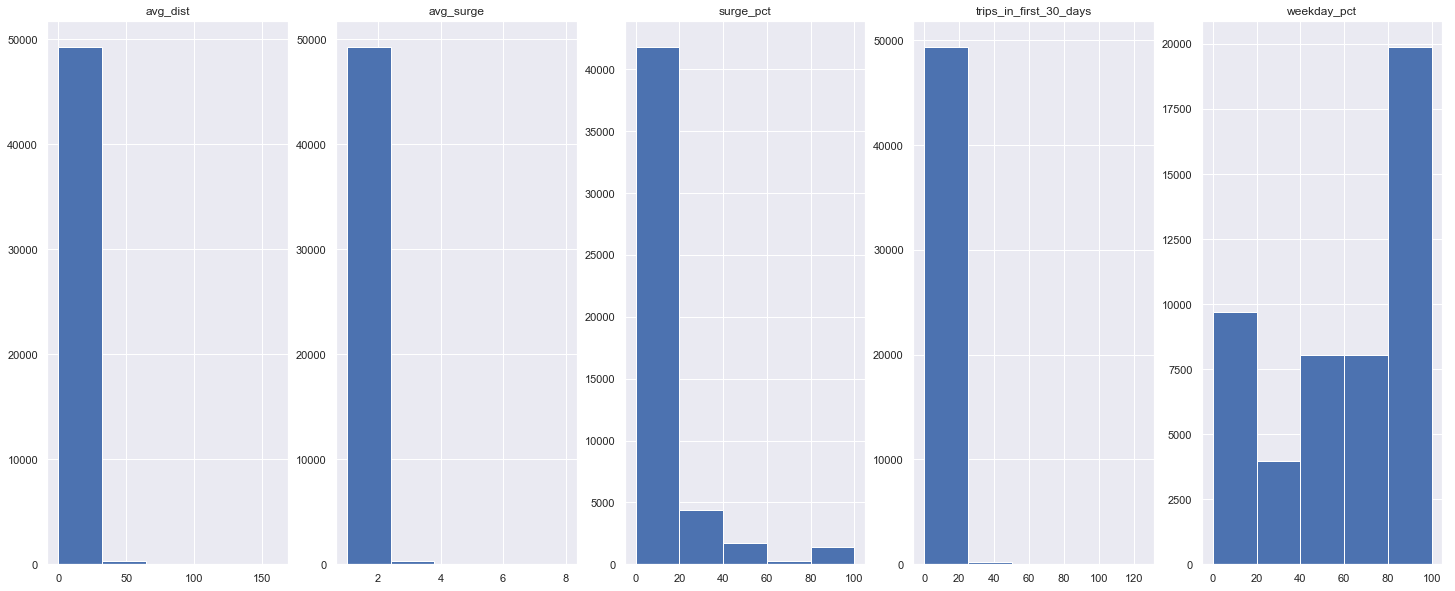

In [94]:
plt.rcParams["figure.figsize"] =(25,10)
fig.tight_layout()
continous = ["avg_dist",  "avg_surge", 
             "surge_pct", "trips_in_first_30_days", "weekday_pct"]


f, axes = plt.subplots(1, 5) 

axes=axes.ravel()
for i, var in enumerate(continous):

    axes[i].hist(df[var].dropna(), bins=5)
    axes[i].set_title(var)
    



For the Features that have a high frequency in the low values, replot by specifying bin width to take a look at the distribution 
of the feature values. 

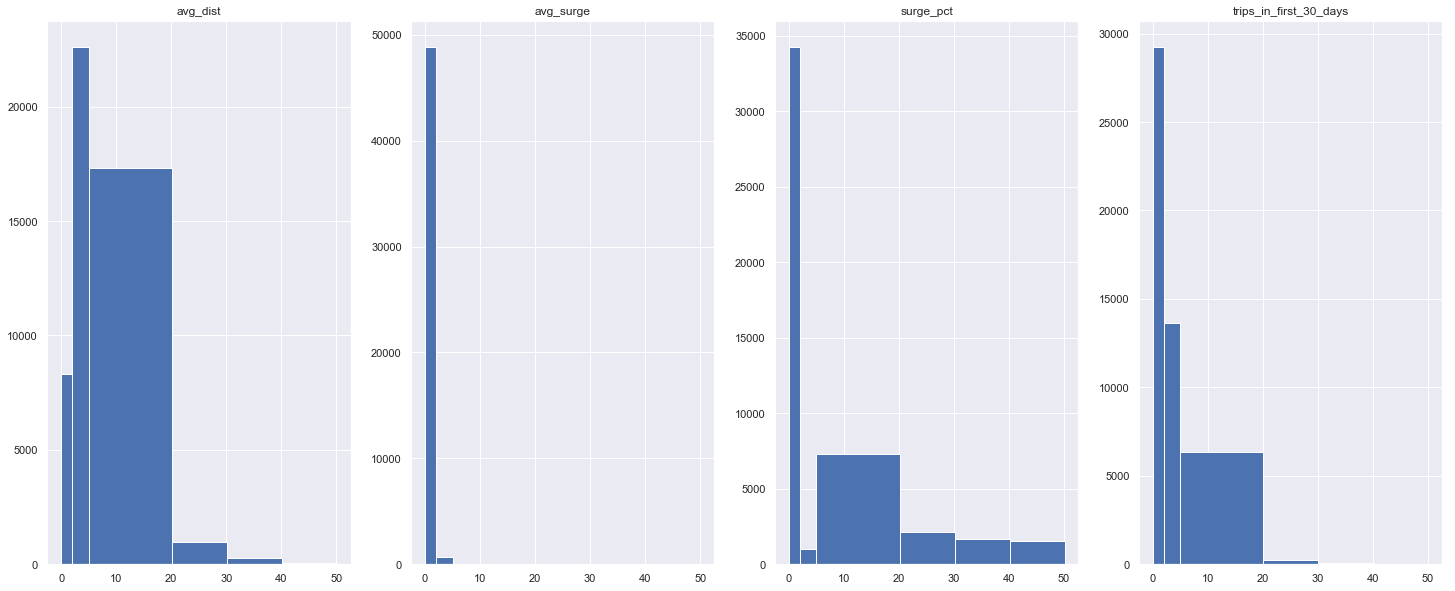

In [95]:
continous_50 = ["avg_dist",  "avg_surge", 
             "surge_pct", "trips_in_first_30_days"]

bins = [0, 2, 5, 20.1, 30.1, 40.1, 50.1]
 
f, axes = plt.subplots(1, 4) 
axes=axes.ravel()
for i, var in enumerate(continous_50):

    axes[i].hist(df[var].dropna(), bins=bins)
    axes[i].set_title(var)
    
plt.show()


#### Categorical Features:

In [96]:
# look at the number of unique categories for each categorical feature
for col_name in ultimate.columns:
    if df[col_name].dtypes in['object', 'bool']:
        unique_cat = len(df[col_name].unique())
        print(" '{col_name}' : {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        

 'city' : 3 unique categories
 'last_trip_date' : 182 unique categories
 'phone' : 2 unique categories
 'signup_date' : 31 unique categories
 'ultimate_black_user' : 2 unique categories


 ##### What fraction of the observed users were retained? 

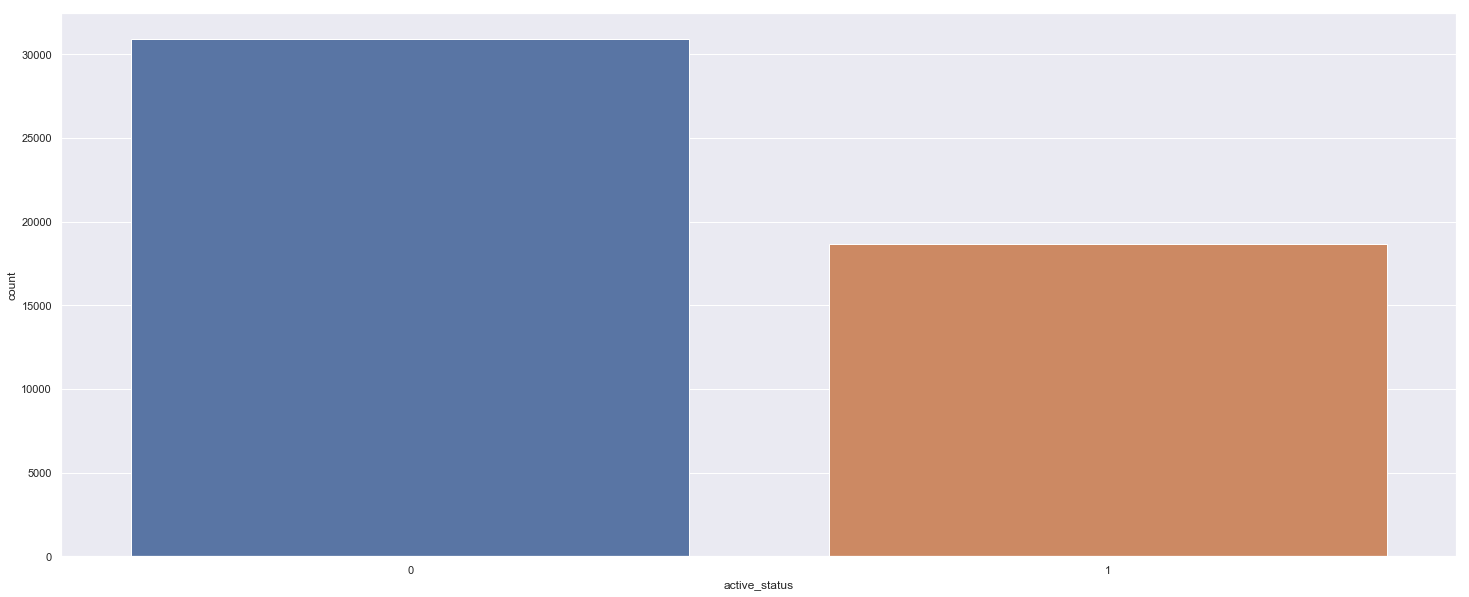

In [97]:
sns.countplot(data=df,
                  x ='active_status')

In [98]:
percent_activestatus = (df['active_status'].value_counts()/len(df['active_status'])) *100
percent_activestatus

0    62.35989
1    37.64011
Name: active_status, dtype: float64

**The percent retained is  37.61%**

#### Predictive Strength of each fearture on the response 'active_status':

In this section a look at the distribution of the features by group "active_status=1" and "active_status" =0 are looked at
to see is there are differences. 

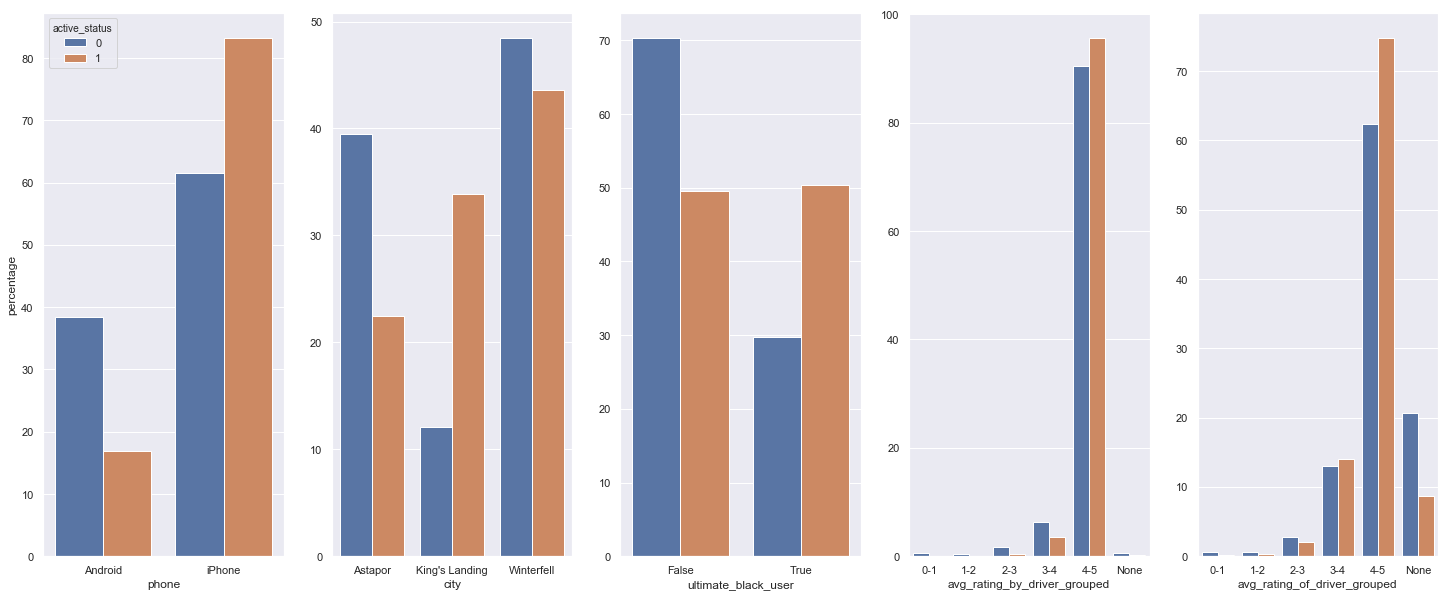

In [99]:
f, axes = plt.subplots(1, 5)

feature =['phone', 'city', 'ultimate_black_user', 'avg_rating_by_driver_grouped', 'avg_rating_of_driver_grouped']

for g, i in enumerate(feature):
    counts=(df.groupby(['active_status'])[i]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(i))
    sns.barplot(x=i, y="percentage", hue="active_status", data=counts, ax=axes[g])
    if g>0:
     axes[g].legend_.remove()
     axes[g].set_ylabel('')
    

The plots above give the percentage of users from the group that belonged to the particular category of the feature.From the above plots the following observations could be made:

1. There are more iphone users for those who were retained( active_status=1) vs more android usage for those who were not retained.
2. There were more users retained from Kings Landing as opposed to less from Astapor and Winterfell.
3. The TRUE and FAlSE proportions for ultimate black user the same for teh retained group but it differs for the group that was not retained in that there are more FALSE that TRUE. 
4. For the average rating by the driver  overall most of the scores were in the 4-5 range with the percentage of the rating scores in the 4-5 scale being  higher for the group that was retained. The percentage for the lower scores was higher for those that were not retained. 
5. For the average rating for the driver, again the higher score had a higher percentage of those that were retained.The lower ratings had a higher percentage of those that were not retained and also the no rating  was higher for those that were not retained.

Conclusion:All of the above features should be included in the model building process as they appear to have some predictive power.

For the continous variables look at boxen plots t is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. For a more extensive explanation, you can read the paper that introduced the plot:

https://vita.had.co.nz/papers/letter-value-plot.html

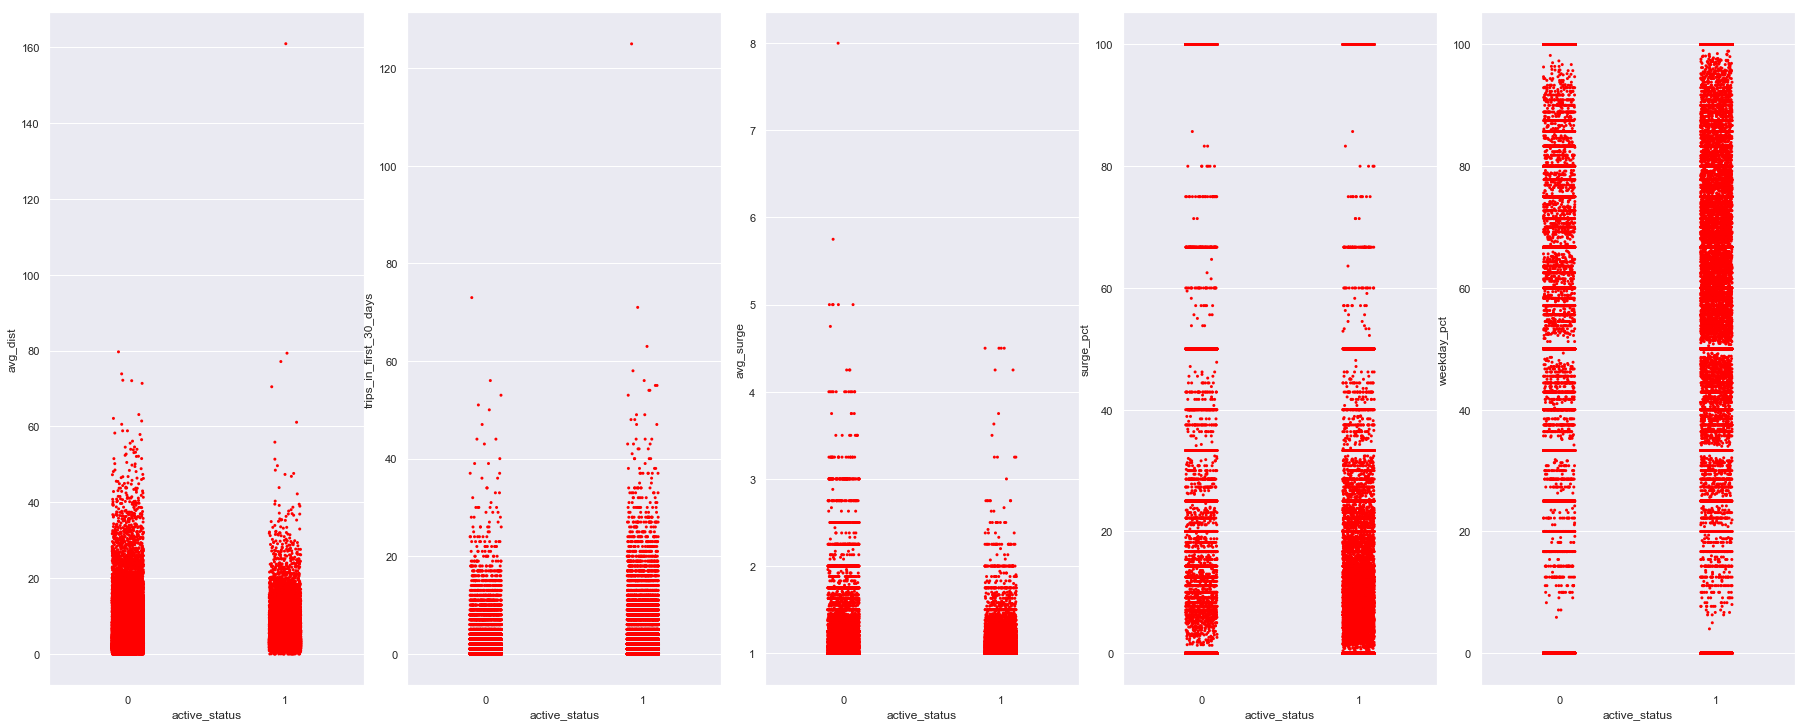

In [100]:
f, axes = plt.subplots(1, 5)
plt.tight_layout()

cols_to_plot1= ["avg_dist", "trips_in_first_30_days", "avg_surge", "surge_pct", "weekday_pct"]
            

for g, i in enumerate(cols_to_plot1):
    
      g = sns.stripplot(x="active_status", y= i, data=df,
                     size=3, jitter=True, color="red", ax=axes[g])           
                   
    

There are some extreme values that need to be looked at as they could be errors in the data. 

In [101]:
print(df.loc[df['avg_dist'] > 140])

       avg_dist  avg_surge     city last_trip_date    phone signup_date  \
20701    160.96        1.0  Astapor     2014-06-26  Android  2014-01-25   

       surge_pct  trips_in_first_30_days  ultimate_black_user  weekday_pct  \
20701        0.0                       0                False        100.0   

       active_status avg_rating_by_driver_grouped avg_rating_of_driver_grouped  
20701              1                         None                         None  


In [103]:
df.drop(index=20701, inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

This entry has an error because the avg_dist is the average distance in miles per trip taken in the first 30 days after signup which is 160.96 but the entry for the number of trips in the first 30 days is 0. 

In [ ]:
print(df.loc[df['trips_in_first_30_days'] > 115])

This observation is hard to determine if it is erroneous. The user tool 125 trips in the first 30 day that averages out to about 3 trips a day which is doable if the user was using it as primary form of communication. So we will leave this observation in.

In [ ]:
df.info()

Create Dummies
The library “sklearn” requires features to be in numeric arrays. So convert the categorical variables into numeric variables by means of dummy coding. In creating dummy variables, a column is created corresponding to each level of the categorical feature where the value equals 1 for those observations that have that particular level and zero for all others.




In [ ]:
df = pd.get_dummies(df)
df.info()   

In [ ]:
sns.heatmap(df.corr())

From looking at the correlations between features the only two features that are correlated are avg_surge and surge_pct. 

We will keep surge_pct and drop avg_surge.

In [ ]:
df.drop("avg_surge", axis=1, inplace=True)

### Prepare the data for Machine Learning algorithms
Now we are ready to create our X and Y variables needed for the machine learning classifiers. Here we will assign the features to X and the active_status to Y


In [ ]:
X = df.drop('active_status', axis = 1)


y= df.active_status

###### Create a Test Set: use stratified sampling by outcome:
Before fitting the model we will set a proportion( 30%) of the data aside for testing. We will use Sklearns train_test_split to split the data into 70%for training ( model fitting) and 30% for testing. By setting the stratify option in train test split to y we are asking that the data be split keeping the same proportion of active_status in the test and the training data.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.30, random_state=42)

### Build models by running machine learning algorithms on training data
Now we are ready to use the training data and fit some machine learning models. Whilst there are several possibilities of models that we could use here we will limit ourselves to assesing three of them.

Logistic Regression :

This is a regression based algorithm where  by fitting the model a probability of a user being in the active category can be obtained. The model is easy to interpret.

Gradient Boosting: ensemble method based on building weak esitmators that are combined to reduce the bias of the final estimator.It is know that this method performs well but iterpretability is not easy.

Random Forest: ensemble method based on averaging decision trees.

Now we will use the funtion run_model to fit the models on the training data and choose the classifier has the best metrics to optimize further.

This function:

Runs a set of models. 3 in this case: Gradient Boosting, Logistic Regression and Random Forest
Makes prediction based on doing GridSearch CV and Cross Validation on the training data
Builds-up a table with evaluation metrics
Plots a roc curve of the estimators

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



rfc = RandomForestClassifier(n_jobs=-1,  oob_score = True, random_state=42 ) 

param_grid = { 
   'n_estimators': [100, 300, 500],
   'max_features': ['auto'],
   'min_samples_leaf': [15, 25],
   'max_depth': [ 5, 15, 20]
}



CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

print (CV_rfc.best_params_)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier(random_state=42)

param_grid = {
               'max_depth':[1,5,10,15],
               'n_estimators':[2,3,4,5],
               }

boost_cv = GridSearchCV(boost_clf, param_grid=param_grid, cv = 5)

boost_cv.fit(X_train, y_train)
print(boost_cv.best_params_)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=42)

param_grid ={"penalty" :['l1', 'l2'], "C" : [0.01,0.1,1,10] }

log_cv = GridSearchCV(logistic, param_grid,
            cv=5, n_jobs=-1)

log_cv.fit(X_train, y_train)

print(log_cv.best_params_)
 


In [ ]:
def run_models(clfs_dict, X_train, y_train):
    
    clfs = clfs_dict
    
    cols = ['model', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()
    

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

       
        
        clf.fit(X_train, y_train)

        y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
        
        y_train_score = cross_val_predict(clf, X_train, y_train, cv=3, method="predict_proba")[:,1]

        

        tmp = pd.Series({
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_train, y_train_score),
                         
                         'precision_score': metrics.precision_score(y_train, y_train_pred),
                         'recall_score': metrics.recall_score(y_train, y_train_pred),
                         'f1_score': metrics.f1_score(y_train, y_train_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_train, y_train_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve')
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix